In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

Lendo o arquivo

In [ ]:
data = pd.read_csv("Air_Traffic_Passenger_Statistics.csv")

In [ ]:
data

,activity_period,operating_airline,operating_airline_iata,published_airline,published_airline_iata,geo_summary,geo_region,activity_type,price_category,terminal,boarding_area,passenger_count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090
...,...,...,...,...,...,...,...,...,...,...,...,...
22864,202012,United Airlines,UA,United Airlines,UA,International,Mexico,Enplaned,Other,International,G,585
22865,202012,United Airlines,UA,United Airlines,UA,International,Mexico,Enplaned,Other,Terminal 3,E,1237
22866,202012,United Airlines,UA,United Airlines,UA,International,Mexico,Enplaned,Other,Terminal 3,F,14765
22867,202012,United Airlines,UA,United Airlines,UA,International,Middle East,Deplaned,Other,International,G,1166


In [ ]:
display(data['passenger_count'].value_counts())

1        17
10       16
4        15
2        15
138      11
         ..
22195     1
18097     1
16046     1
11948     1
14495     1
Name: passenger_count, Length: 16018, dtype: int64

Especificando as features e o rótulo, e lidando com variáveis categóricas




In [ ]:
X_, y = data.drop(columns=['passenger_count']), data['passenger_count']
X = pd.get_dummies(X_)

Dividindo dados em 70% para treino e 30% para teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Utilizando KNN com diferentes valores de k

In [ ]:
mae_values = [ ]
rmse_values = [ ]
K = [ ]

for k in range(10):
    k = k + 1
    K.append(k)

    model = KNeighborsRegressor(n_neighbors = k)

    model.fit(X_train, y_train)    #ajusta os dados de treino
    y_pred = model.predict(X_test) #prevê a meta para os dados fornecidos
    error1 = mean_absolute_error(y_test, y_pred)     #calcula MAE
    error2 = np.sqrt(mean_squared_error(y_test, y_pred)) #calcula RMSE
    #armazena valores de erro
    mae_values.append(error1)
    rmse_values.append(error2)

    #mostra valores
    print('k = ', k)
    print('MAE é:', error1)
    print('RMSE é:', error2)


k =  1
MAE é: 5397.095321381723
RMSE é: 25233.58679956479
k =  2
MAE é: 7683.5024777729195
RMSE é: 28852.945363817398
k =  3
MAE é: 10564.621143662243
RMSE é: 32883.04120611972
k =  4
MAE é: 12773.12487246757
RMSE é: 35639.64216818136
k =  5
MAE é: 14681.307302142546
RMSE é: 37450.365469622
k =  6
MAE é: 16352.84212699801
RMSE é: 39181.21957989681
k =  7
MAE é: 17720.045266204426
RMSE é: 40384.440726572546
k =  8
MAE é: 19114.160144293834
RMSE é: 41685.719973247884
k =  9
MAE é: 20188.66409172618
RMSE é: 42724.881590730736
k =  10
MAE é: 20952.02197930331
RMSE é: 43169.62442028771


Análise gráfica dos resultados

In [ ]:
desvio = data['passenger_count']

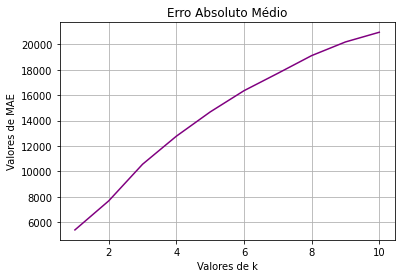

In [ ]:
plt.grid()
plt.plot(K, mae_values, color='purple')
plt.title('Erro Absoluto Médio')

plt.xlabel('Valores de k')
plt.ylabel('Valores de MAE')

plt.show()

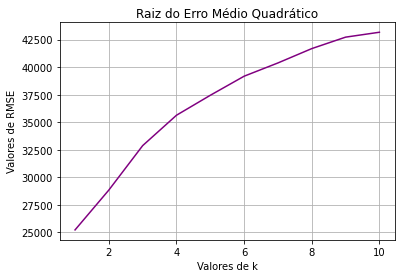

In [ ]:
plt.grid()
plt.plot(K, rmse_values, color='purple')
plt.title('Raiz do Erro Médio Quadrático')

plt.xlabel('Valores de k')
plt.ylabel('Valores de RMSE')

plt.show()

Utilizando Normalização

In [ ]:
scaler_norm = preprocessing.MinMaxScaler()
X_train_norm = scaler_norm.fit_transform(X_train)
X_test_norm = scaler_norm.transform(X_test)

In [ ]:
mae_values = [ ]
rmse_values = [ ]
K = [ ]
for k in range(10):
    k = k + 1
    K.append(k)

    model = KNeighborsRegressor(n_neighbors = k)

    model.fit(X_train_norm, y_train)
    pred = model.predict(X_test_norm)
    error1 = mean_absolute_error(y_test, pred)
    error2 = np.sqrt(mean_squared_error(y_test,pred))

    mae_values.append(error1)
    rmse_values.append(error2)

    print('k = ', k)
    print('MAE é:', error1)
    print('RMSE é:', error2)

k =  1
MAE é: 3530.6076373706455
RMSE é: 11232.158712825187
k =  2
MAE é: 3396.7548462323275
RMSE é: 10570.814707631493
k =  3
MAE é: 3804.2621580916293
RMSE é: 11730.453471939547
k =  4
MAE é: 4192.666192974785
RMSE é: 13048.14050963552
k =  5
MAE é: 4426.454248651799
RMSE é: 13894.405285769866
k =  6
MAE é: 4669.40917261818
RMSE é: 14615.07867125915
k =  7
MAE é: 4819.37435192704
RMSE é: 14544.056689426214
k =  8
MAE é: 4931.386550794345
RMSE é: 14503.826917780481
k =  9
MAE é: 5018.881633710667
RMSE é: 14385.556530845222
k =  10
MAE é: 5125.910814750036
RMSE é: 14638.98399315818


Análise gráfica dos dados

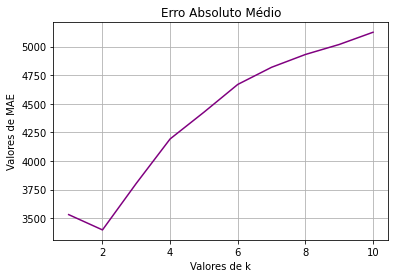

In [ ]:
plt.grid()
plt.plot(K, mae_values, color='purple')
plt.title('Erro Absoluto Médio')

plt.xlabel('Valores de k')
plt.ylabel('Valores de MAE')

plt.show()

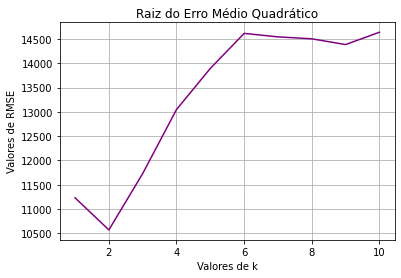

In [ ]:
plt.grid()
plt.plot(K, rmse_values, color='purple')
plt.title('Raiz do Erro Médio Quadrático')

plt.xlabel('Valores de k')
plt.ylabel('Valores de RMSE')

plt.show()

Utilizando Standardização

In [ ]:
scaler_std = preprocessing.StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)

In [ ]:
mae_values = [ ]
rmse_values = [ ]
K = [ ]

for k in range(10):
    k = k + 1
    K.append(k)

    model = KNeighborsRegressor(n_neighbors = k)

    model.fit(X_train_std, y_train)
    y_pred = model.predict(X_test_std)
    error1 = mean_absolute_error(y_test, y_pred)
    error2 = np.sqrt(mean_squared_error(y_test, y_pred))

    mae_values.append(error1)
    rmse_values.append(error2)

    print('k = ', k)
    print('MAE é:', error1)
    print('RMSE é:', error2)

k =  1
MAE é: 3551.499344118933
RMSE é: 11573.266014802415
k =  2
MAE é: 3395.410508672205
RMSE é: 10473.014438118531
k =  3
MAE é: 3812.017295826653
RMSE é: 11730.85619326765
k =  4
MAE é: 4226.3932006996065
RMSE é: 13074.678987048565
k =  5
MAE é: 4432.896895496284
RMSE é: 13808.563944585292
k =  6
MAE é: 4664.326993149687
RMSE é: 14625.189595388496
k =  7
MAE é: 4823.358444208467
RMSE é: 14559.564260456236
k =  8
MAE é: 4924.542577612593
RMSE é: 14502.7319285284
k =  9
MAE é: 5010.089005489968
RMSE é: 14402.770664698382
k =  10
MAE é: 5116.874202011369
RMSE é: 14602.973182022093


Análise gráfica dos dados

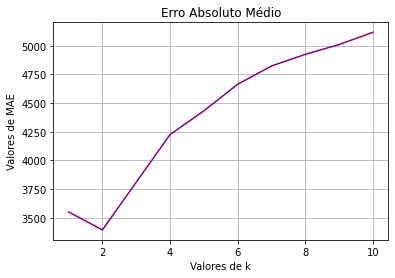

In [ ]:
plt.grid()
plt.plot(K, mae_values, color='purple')
plt.title('Erro Absoluto Médio')

plt.xlabel('Valores de k')
plt.ylabel('Valores de MAE')

plt.show()

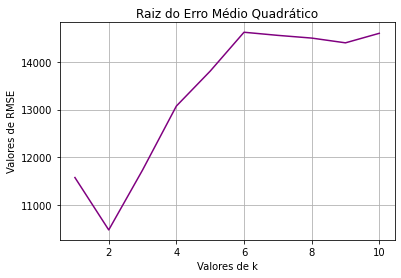

In [ ]:
plt.grid()
plt.plot(K, rmse_values, color='purple')
plt.title('Raiz do Erro Médio Quadrático')

plt.xlabel('Valores de k')
plt.ylabel('Valores de RMSE')

plt.show()

Através das análises feitas anteriormente pode-se notar que o melhor valor de k é 2, utilizando a Standardização.

Criando modelo para k = 2

In [ ]:
media = data['passenger_count'].mean()

In [ ]:
model = KNeighborsRegressor(n_neighbors = 2)

model.fit(X_train_std, y_train)
y_pred = model.predict(X_test_std)

In [ ]:
error = mean_absolute_error(y_test, y_pred)
error

3395.410508672205

In [ ]:
for pred in y_pred:
    if pred < media:
       print(pred,'passengers: Traffic level is low.')
    elif (pred == media) or ((pred < 2 * media)):
       print(pred,'passengers: Traffic level is medium.')
    else:
       print(pred,'passengers: Traffic level is high.')

A saída de streaming foi truncada nas últimas 5000 linhas.
18781.0 passengers: Traffic level is low.
67844.0 passengers: Traffic level is high.
6601.0 passengers: Traffic level is low.
13163.5 passengers: Traffic level is low.
4.0 passengers: Traffic level is low.
7451.5 passengers: Traffic level is low.
6919.0 passengers: Traffic level is low.
5193.0 passengers: Traffic level is low.
13391.0 passengers: Traffic level is low.
9359.0 passengers: Traffic level is low.
11599.5 passengers: Traffic level is low.
7443.5 passengers: Traffic level is low.
33325.0 passengers: Traffic level is medium.
686.5 passengers: Traffic level is low.
50176.0 passengers: Traffic level is medium.
10535.0 passengers: Traffic level is low.
8729.0 passengers: Traffic level is low.
3745.0 passengers: Traffic level is low.
8340.5 passengers: Traffic level is low.
17026.5 passengers: Traffic level is low.
333004.5 passengers: Traffic level is high.
135891.5 passengers: Traffic level is high.
127507.0 passengers: 

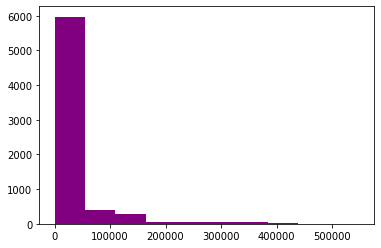

In [ ]:
plt.hist(y_test, color='purple');

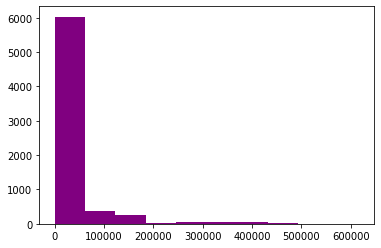

In [ ]:
plt.hist(y_pred, color='purple');